In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv('new.csv')

In [3]:
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03/12/2016,2.5,3067,...,1,1,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/2016,2.5,3067,...,1,0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/2017,2.5,3067,...,2,0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/2017,2.5,3067,...,2,1,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/2016,2.5,3067,...,1,2,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [4]:
X = df[['Bedrooms','Bathroom','Car','Landsize','Rooms']]

In [5]:
y = df['Price']

Linear Regression

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lin = LinearRegression()

In [10]:
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
coeff_df = pd.DataFrame(lin.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Bedrooms,-24261.917234
Bathroom,269250.744351
Car,10371.342041
Landsize,0.575511
Rooms,233288.979158


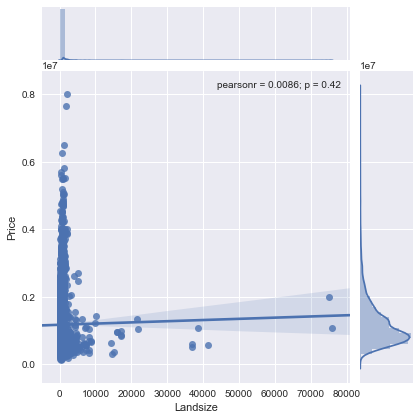

In [12]:
sns.jointplot('Landsize','Price',data=df,kind='reg')

Because we cannot make out much we will shorten our range 

In [13]:
df['Suburb'].value_counts().head(3)

Reservoir         272
Bentleigh East    217
Preston           205
Name: Suburb, dtype: int64

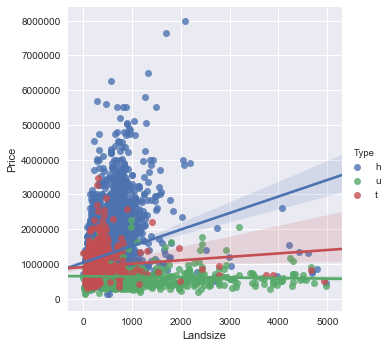

In [14]:
sns.lmplot('Landsize','Price',data=df[df['Landsize'] < 5000],hue='Type')

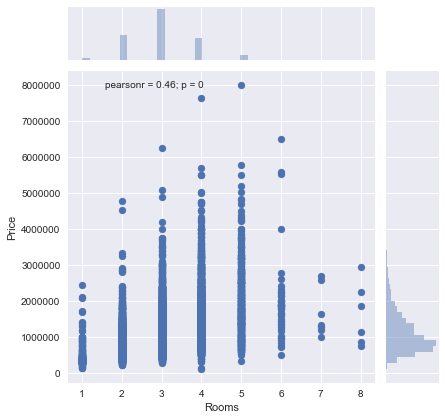

In [15]:
sns.jointplot('Rooms','Price',data=df)

a graph with idea of ranges of rooms

In [16]:
set1 = df.groupby('Suburb').count()
set1.head()

,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,Bedrooms,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Suburb,,,,,,,,,,,,,,,,,,,,
Abbotsford,36,36,36,36,36,36,36,36,36,36,36,36,36,31,29,36,36,36,36,36
Aberfeldie,29,29,29,29,29,29,29,29,29,29,29,29,29,18,21,29,29,29,29,29
Airport West,53,53,53,53,53,53,53,53,53,53,53,53,53,31,34,53,53,53,53,53
Albanvale,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1
Albert Park,57,57,57,57,57,57,57,57,57,57,57,57,57,27,30,57,57,57,57,57


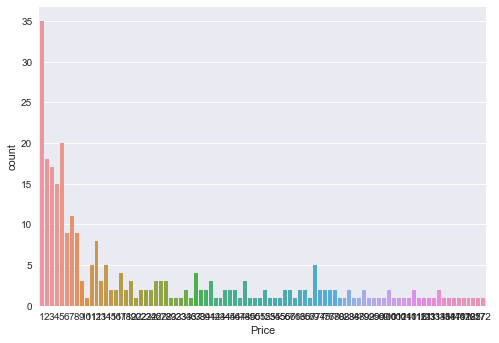

In [17]:
sns.countplot('Price',data=set1)

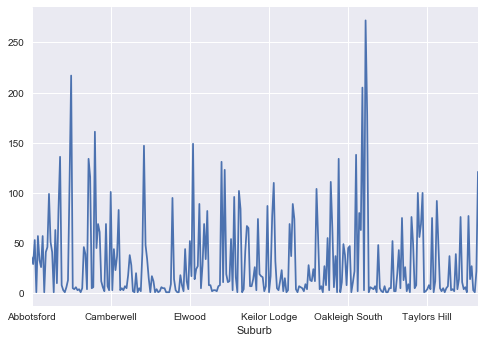

In [18]:
set1['Price'].plot()

In [19]:
set1[set1['Price']>150]

,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,Bedrooms,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Suburb,,,,,,,,,,,,,,,,,,,,
Bentleigh East,217,217,217,217,217,217,217,217,217,217,217,217,217,107,116,217,217,217,217,217
Brunswick,161,161,161,161,161,161,161,161,161,161,161,161,161,98,108,161,161,161,161,161
Preston,205,205,205,205,205,205,205,205,205,205,205,205,205,98,110,205,205,205,205,205
Reservoir,272,272,272,272,272,272,272,272,272,272,272,272,272,134,155,272,272,272,272,272
Richmond,178,178,178,178,178,178,178,178,178,178,178,178,178,97,113,178,178,178,178,178


Our top sellers in terms of numbers

In [20]:
set1[set1['Price'] == 0]

,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,Bedrooms,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Suburb,,,,,,,,,,,,,,,,,,,,


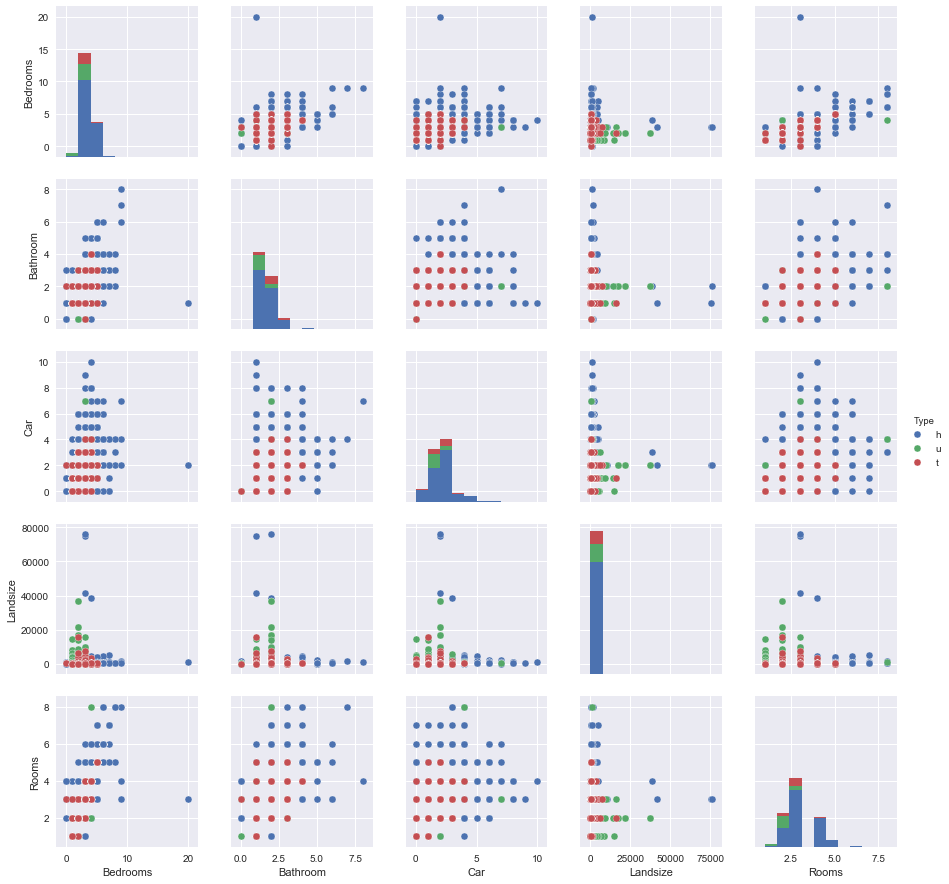

In [21]:
sns.pairplot(df[['Bedrooms','Type','Bathroom','Car','Landsize','Rooms']],hue='Type')

In [22]:
set2 = df.groupby('Suburb',as_index=False)


In [23]:
set2['Price'].sum().min()

Suburb    Abbotsford
Price         340000
dtype: object

In [24]:
# total sales in each suburb 
dex =set2['Price'].sum()
dex.head()

,Suburb,Price
0,Abbotsford,42393500
1,Aberfeldie,40553000
2,Airport West,39207500
3,Albanvale,526500
4,Albert Park,111327000


In [25]:
dex[dex['Price'] == dex['Price'].max()]

,Suburb,Price
36,Brighton,274371888


In [26]:
dex[dex['Price'] == dex['Price'].min()]

,Suburb,Price
218,Rockbank,340000


274371888 : highest sales total
340000     : lowest total

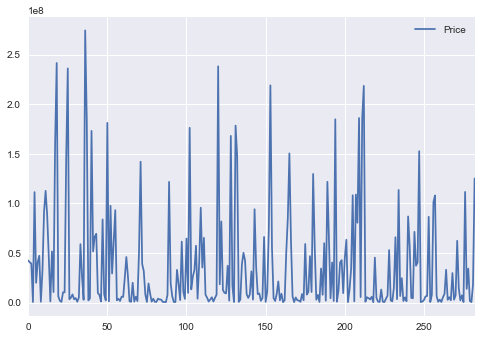

In [27]:
set2['Price'].sum().plot()

In [28]:
set2 = df.groupby('Seller',as_index=False)

In [29]:
# total sales in each suburb 
dex =set2['Price'].sum()
dex.head()

,Seller,Price
0,@Realty,1224000
1,ASL,2995500
2,Abercromby's,35239000
3,Ace,580000
4,Alexkarbon,20303090


In [30]:
dex[dex['Price'] == dex['Price'].max()]

,Seller,Price
88,Jellis,1304954522


In [31]:
dex[dex['Price'] == dex['Price'].min()]

,Seller,Price
135,Oak,380000


In [32]:
df.shape

(8810, 21)

In [38]:
df1 = pd.read_excel('data.xlsx')

In [39]:
df1.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,42798,2.5,3067,...,2,0,134,150.0,1830,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
1,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,42525,2.5,3067,...,1,2,120,142.0,1850,Yarra,-37.8072,144.9941,Northern Metropolitan,4019
2,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,42497,2.5,3067,...,2,0,245,210.0,1850,Yarra,-37.8024,144.9993,Northern Metropolitan,4019
3,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,42651,2.5,3067,...,1,2,256,107.0,1850,Yarra,-37.8060,144.9954,Northern Metropolitan,4019
4,Abbotsford,10 Valiant St,2,h,1097000,S,Biggin,42651,2.5,3067,...,1,2,220,75.0,1850,Yarra,-37.8010,144.9989,Northern Metropolitan,4019


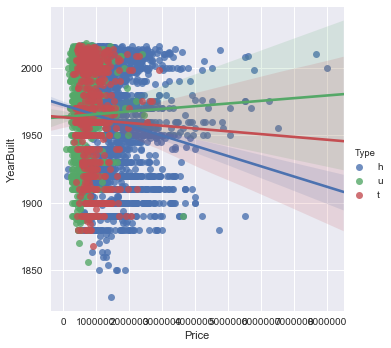

In [42]:
sns.lmplot('Price','YearBuilt',data=df1,hue='Type')